1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

A simple linear regression model is a model used to study the relationship between two variables, one of which is a predictor (independent variable) and the other is an outcome (dependent variable). This model tries to find a straight line to describe the relationship between the predictor and the outcome.

To make this relationship more accurate, the line has two key parameters:

Intercept: This represents the starting value of the outcome variable when the predictor is zero. The point where the line intersects the y-axis on the graph.

Slope: This represents how much the outcome variable will increase (or decrease) for each unit increase in the predictor variable. The slope of the line is the size of the slope.

In real data, we will not always get a perfect straight line relationship because there are always unpredictable factors that affect the outcome variable. Therefore, an error term is added to represent these random, uncontrollable effects. This error term is assumed to be "normally distributed", that is, randomly distributed on both sides of the line.

Therefore, a simple linear regression model is like adding some random fluctuations to a straight line to simulate the data more realistically. Each value of the outcome variable in the model is a combination of the predicted value (the point on the line) and the error term (the fluctuation part).

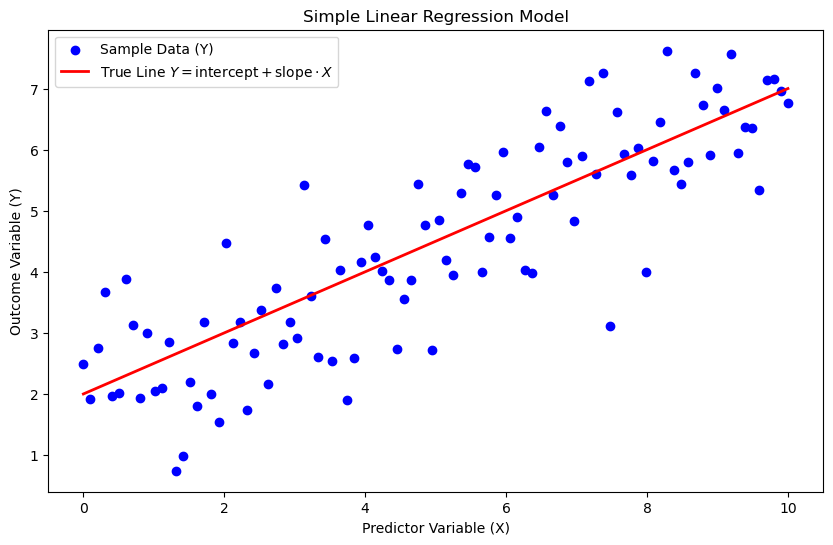

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

intercept = 2.0
slope = 0.5
std_dev = 1.0

np.random.seed(42)
X = np.linspace(0, 10, 100)
error = norm.rvs(loc=0, scale=std_dev, size=X.shape)
Y = intercept + slope * X + error

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Sample Data (Y)')
plt.plot(X, intercept + slope * X, color='red', linewidth=2, label=r'True Line $Y = \text{intercept} + \text{slope} \cdot X$')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Simple Linear Regression Model')
plt.legend()
plt.show()

2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           6.61e-30
Time:                        00:02:57   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8272      0.181     10.094      0.0

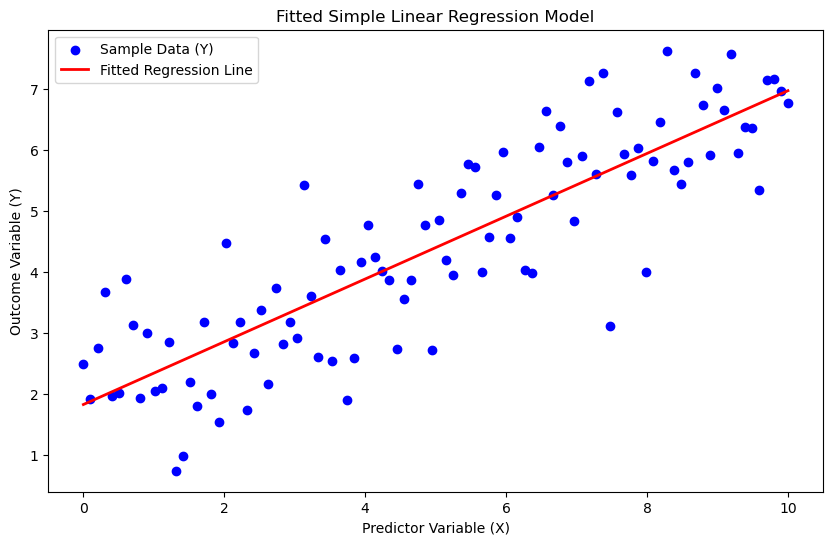

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.formula.api as smf

# Step 1: Simulate data for the Simple Linear Regression model
intercept = 2.0
slope = 0.5
std_dev = 1.0

np.random.seed(42)
X = np.linspace(0, 10, 100)
error = norm.rvs(loc=0, scale=std_dev, size=X.shape)
Y = intercept + slope * X + error

# Step 2: Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 3: Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Step 4: Print model summary to see coefficients and statistics
print(model.summary())

# Step 5: Visualize the data and fitted line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Sample Data (Y)')
plt.plot(data['X'], model.fittedvalues, color='red', linewidth=2, label='Fitted Regression Line')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Fitted Simple Linear Regression Model')
plt.legend()
plt.show()

3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

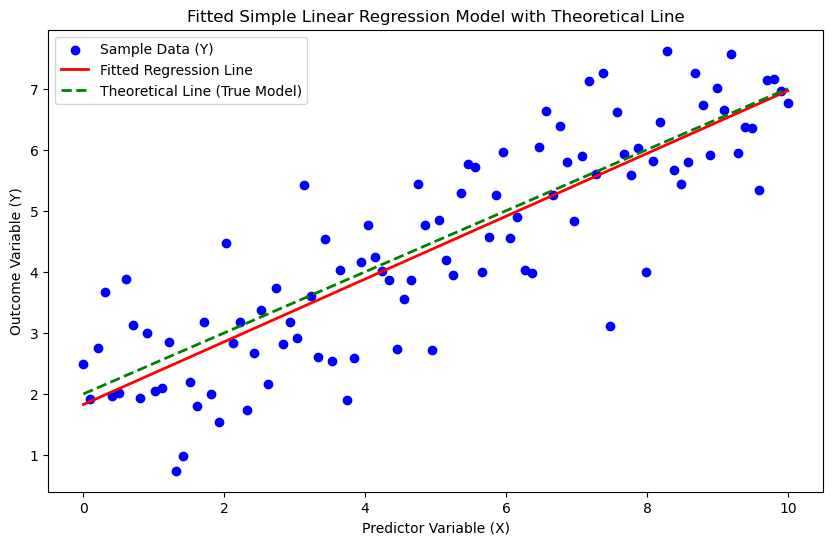

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.formula.api as smf

# Step 1: Simulate data for the Simple Linear Regression model
intercept = 2.0
slope = 0.5
std_dev = 1.0

np.random.seed(42)
X = np.linspace(0, 10, 100)
error = norm.rvs(loc=0, scale=std_dev, size=X.shape)
Y = intercept + slope * X + error

# Step 2: Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 3: Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Step 4: Visualize the data, fitted line, and theoretical line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Sample Data (Y)')
plt.plot(data['X'], model.fittedvalues, color='red', linewidth=2, label='Fitted Regression Line')
plt.plot(data['X'], intercept + slope * X, color='green', linestyle='--', linewidth=2, label='Theoretical Line (True Model)')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Fitted Simple Linear Regression Model with Theoretical Line')
plt.legend()
plt.show()

Solid red line (Fitted Regression Line): This is the regression line obtained by fitting the data through statsmodels. It is the result of least squares regression based on simulated data. Because the data contains random error terms, this regression line will change slightly each time the simulation is sampled. It reflects an estimate based on the sample data, not necessarily the "true" relationship of the original model.

Dashed green line (Theoretical Line, True Model): This is an ideal straight line drawn based on known theoretical parameters (intercept 𝛽0=2.0 and slope 𝛽1=0.5) and does not contain any random errors. It represents the "true" relationship of the model and is the basis for generating data, but we cannot directly observe it in actual data.

Difference between the two lines
The theoretical line (dashed green line) is an idealized model that assumes that there are no random errors, so it represents the "true" linear relationship between the independent variable and the dependent variable.
The fitted line (solid red line) is estimated on the sample data and is therefore affected by the random errors in the data. Each time we regenerate data from this model, the fitted line will change slightly because the random error terms in the sample are different. This kind of variation is called random sampling variation.

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

fitted_model.fittedvalues is the predicted Y value for each
X calculated based on the estimated intercept and slope (fitted_model.params) from the regression model. Specifically, it is obtained by substituting X into the linear equation Y = β 0 + β 1X. These predicted values reflect the best fit of the model at each value of X.

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

In the "ordinary least squares" (OLS) method, the fitted line is chosen to minimize the sum of the squares of the vertical distances of all data points to the regression line. These "squares" are used to penalize points with large deviations so that positive and negative deviations do not cancel each other out, thus obtaining a best fit that minimizes the overall impact of the error.

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

It can be interpreted as the proportion of the total variation of the dependent variable Y that is explained by the model.
Here SSR (Explained Sum of Squares) is the sum of squares between the model's fitted values (fitted_model.fittedvalues) and the mean of Y, representing the variation explained by the model.
SST (Total Sum of Squares) is the sum of squares between the observed values ​​of Y and its mean, representing the total variation of Y.
SSE (Residual Sum of Squares) is the sum of squares between the observed values ​​and the fitted values, representing the unexplained variation.

The equation represents the proportion of variation in
Y explained by the model, thus measuring the accuracy of the model, that is, the quality of the model fit.
np.corrcoef(...)[0,1]**2 calculates the squared correlation coefficient between the independent variable
X and the dependent variable Y, indicating the magnitude of their linear correlation. In a simple linear regression model,
R^2 is equal to the square of the correlation coefficient, so np.corrcoef(...)[0,1]**2 also captures the explanatory power of
X on Y.

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

Linear Relationship Assumption: The simple linear regression model assumes that there is a linear relationship between the independent variable (fertilizer application) and the dependent variable (crop yield). However, the scatter plot shows that the change in yield with fertilizer application does not seem to be completely linear; there may be nonlinear trends, especially when the yield increases at lower and higher fertilizer application rates. This suggests that the data may be better suited to a nonlinear regression model.

Residual Normality and Constant Variance Assumption: The simple linear regression model assumes that the residuals should be approximately normally distributed and have constant variance (i.e., "homoskedasticity"), but the histogram of the residuals shows that the residuals are not perfectly normally distributed and the variance changes with fertilizer application, which may indicate uneven variance. This uneven variance (heteroskedasticity) may indicate that the prediction accuracy or the dispersion of the data is changing as the fertilizer application increases.

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

Clarify the null hypothesis: State the null hypothesis as "no linear association", that is, the slope parameter β 1=0. This means that there is no linear relationship on average between the independent variable (waiting time) and the dependent variable (eruption duration).
Analyze and interpret regression results: in terms of slope, p_value, and r_value**2 (i.e.
R^2) output results:

p-value: A p-value less than 0.05 indicates that there is sufficient statistical evidence to reject the null hypothesis and conclude that there is a significant linear relationship between waiting time and eruption duration.
R-squared values: Interpreting R^2
 value, which indicates how much variation the model explains. higher
R^2
 Indicates a better fit.
Interpretation of the data: Combining p-values ​​and
R^2
 value, to conclude whether waiting time can be considered to significantly affect eruption duration. If the p-value is small and
R^2
 At higher levels, a significant linear correlation can be considered between waiting time and eruption duration, supporting the belief that a correlation exists.

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

State the null hypothesis: Assume that for short waiting times, there is no linear relationship between waiting time and eruption duration, that is, the slope
β1=0.

p-values and R-squared interpretation:

For each short wait time limit (62, 64, 66 minutes), list the p-values ​​and
R^2
 value.
A p-value less than 0.05 indicates sufficient evidence to reject the null hypothesis, indicating that there is a significant linear relationship between waiting time and eruption duration even at short waiting times.
A large p-value (e.g. > 0.05) indicates that there is insufficient evidence for a significant linear relationship within that limit.

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:
create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

simulate samples (of size n=160) from a Simple Linear Regression model that uses 
, 
, 
 along with the values of waiting for 
 to create simuations of 
 and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

report if 
 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?


Bootstrap confidence interval:

The 95% Bootstrap confidence interval of the output (calculated from the code's bootstrap_ci_lower and bootstrap_ci_upper) shows the range of variation in the model slope under long wait times.
If the original slope (original_slope) falls within this interval, it indicates that the model's slope estimate for long waiting times is relatively stable and there may be a significant linear relationship; if it is not within the interval, it indicates that the model slope is unstable.
Comparison of simulated p-values ​​and OLS p-values:

Use the simulated p-value (simulated_p_value) under the assumption of no correlation (slope of 0) to determine the significance of the actual data slope.
Compare simulated_p_value to the p-value from the OLS analysis (ols_p_value). If the two are similar (usually the error is less than 0.05), it means that the simulation results are consistent with the results of the OLS analysis, further supporting the significance of the original slope.

link：https://chatgpt.com/share/672185ed-0b8c-8004-8d83-cf083c65fa9e